In [1]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
!wget https://raw.githubusercontent.com/victorgau/wordcloud/master/SourceHanSansTW-Regular.otf
!wget https://raw.githubusercontent.com/victorgau/wordcloud/master/dict.txt.big

from matplotlib.font_manager import fontManager

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np

--2024-01-10 04:02:50--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.139.100, 74.125.139.139, 74.125.139.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.139.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3e9i0nhk27rm092lh944ik546qafedeh/1704859350000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=58fec5a9-f8c7-4a50-b3b9-41eb061df1de [following]
--2024-01-10 04:02:51--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3e9i0nhk27rm092lh944ik546qafedeh/1704859350000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=58fec5a9-f8c7-4a50-b3b9-41eb061df1de
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 173.194.218.132, 2607:f8b0:400c:c14::84
Connecting to doc-0

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
gmt_df = pd.read_csv('/content/drive/Shareddrives/TextMining_Disk/LAB_Folder/Final_project/Jeff/predict_result_Bidirectional_LSTM.csv')
gmt_df.rename(columns={'Unnamed: 0': 'category'}, inplace=True)

gmt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   time_points  96 non-null     int64
 1   書籍及雜誌期刊      96 non-null     int64
 2   美食、伴手禮       96 non-null     int64
 3   嬰幼童與母親       96 non-null     int64
 4   運動、健身        96 non-null     int64
 5   家電影音         96 non-null     int64
 6   美妝保健         96 non-null     int64
 7   其他類別         96 non-null     int64
 8   飾品、配件        96 non-null     int64
 9   手機平板與周邊      96 non-null     int64
 10  電玩、遊戲        96 non-null     int64
 11  男生包包與配件      96 non-null     int64
 12  居家生活         96 non-null     int64
 13  女生包包、精品      96 non-null     int64
 14  男生衣著         96 non-null     int64
 15  3C與筆電        96 non-null     int64
 16  服務、票券        96 non-null     int64
 17  戶外、旅行        96 non-null     int64
 18  寵物           96 non-null     int64
 19  男女鞋          96 non-null     int64
 20  汽機車零件百貨     

In [4]:
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

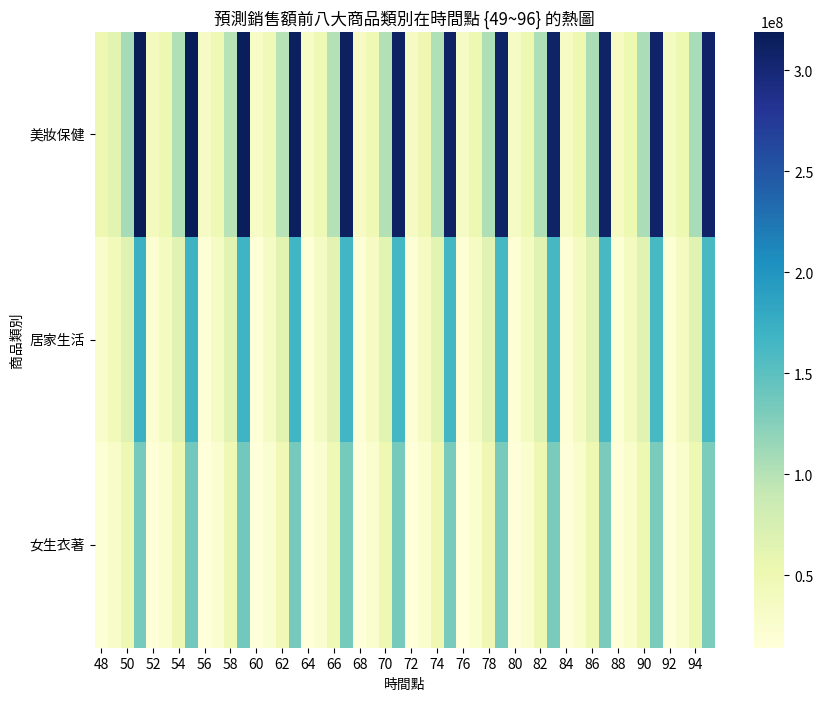

In [5]:
# 選取時間點在 {49~96} 的資料
time_points_49_to_96 = gmt_df[gmt_df['time_points'].between(49, 96)]

# 移除時間點的欄位
data = time_points_49_to_96.drop(columns=['time_points'])

# 計算每個類別在時間點 {49~96} 的總銷售額並排序取前八大類別
category_total_sales = data.sum()
top_eight_categories = category_total_sales.nlargest(3).index.tolist()

# 篩選前八大類別的資料並繪製熱圖
top_eight_data = data[top_eight_categories]

plt.figure(figsize=(10, 8))
sns.heatmap(top_eight_data.T, cmap='YlGnBu', annot=False, fmt="d")
plt.title('預測銷售額前八大商品類別在時間點 {49~96} 的熱圖')
plt.xlabel('時間點')
plt.ylabel('商品類別')
plt.yticks(rotation=0)
plt.show()

In [6]:
time_points_49_to_96 = gmt_df[gmt_df['time_points'].between(49, 96)]
time_points_49_to_96

,time_points,書籍及雜誌期刊,美食、伴手禮,嬰幼童與母親,運動、健身,家電影音,美妝保健,其他類別,飾品、配件,手機平板與周邊,...,男生衣著,3C與筆電,服務、票券,戶外、旅行,寵物,男女鞋,汽機車零件百貨,女生衣著,娛樂、收藏,文創商品
48,49,4127060,14403035,3338115,1130792,9487998,50596324,0,18607078,4207163,...,12228181,3103633,2727977,933514,3552781,3340896,2492708,20862152,6094664,225087
49,50,4381654,13592165,4682672,893536,12557934,63909552,9113,13230783,4182757,...,10892988,2264237,8754542,762470,2671751,2894623,2708691,29881036,7171600,218913
50,51,6289425,33885288,7833957,1298463,17685672,109397936,50431,19249452,6430451,...,13862029,3217763,15755170,1894926,5760171,4780034,4470070,51183204,13925539,359566
51,52,22030636,165251632,21194536,8130491,38800704,318541888,120389,103694104,23371730,...,53330840,16284588,22933306,9151449,33314032,16802432,15927389,135101744,40774668,1612315
52,53,3418351,14020219,2832550,1007787,8668887,40450368,28,16315496,3802399,...,10658989,2653624,2391846,965837,2600564,2987156,1857770,17433032,5469878,187143
53,54,3714324,10015921,3965371,658088,11662290,52899284,20788,10738479,3673250,...,9421854,1724817,7910507,556065,1636063,2374100,2133694,25942808,5567733,161675
54,55,5819414,31495248,7710836,1106725,18189770,102363280,51619,17230726,6110682,...,12376291,2903585,15833278,1705401,5204674,4375309,3954000,50203972,13275209,310705
55,56,22005552,168076528,21579512,8136185,40151920,319094176,135650,105404880,23478818,...,53495012,16568904,22909434,9229422,33924472,16976344,15721147,136219680,41144548,1620650
56,57,3191093,11332333,2355483,887635,7833957,34336660,0,14693478,3310269,...,9957732,2323526,1901451,801841,1990493,2601550,1624065,14878814,4611842,168242
57,58,3531756,7615787,3650534,562097,11099350,47728196,17770,9545812,3276140,...,9026040,1510334,7350743,426472,1242852,2103348,1975341,24613722,4819302,146765


<ipython-input-7-5cfdc729668b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_points_49_to_96['time_segments'] = time_points_49_to_96['time_points'] % 4
<ipython-input-7-5cfdc729668b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_points_49_to_96['time_segments'] = time_points_49_to_96['time_segments'].map({1: 'A', 2: 'B', 3: 'C', 0: 'D'})


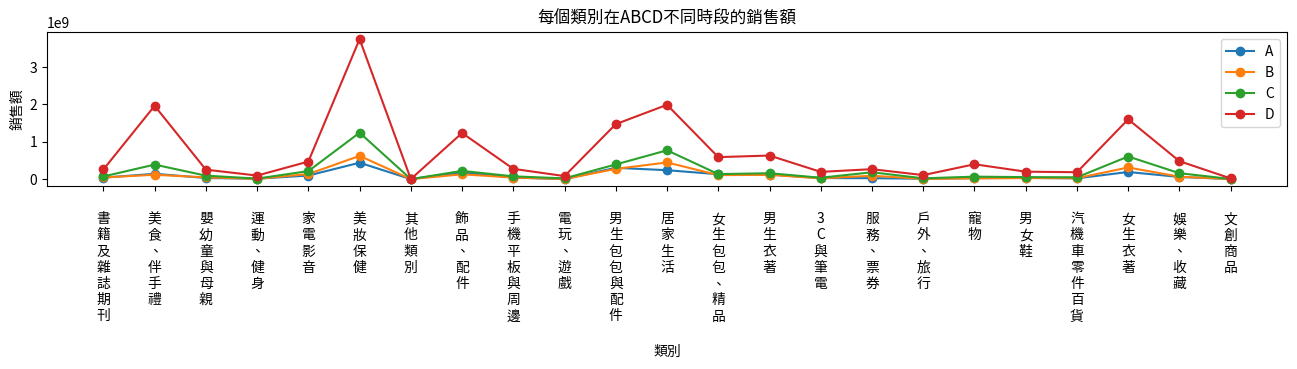

In [7]:
# 選取時間點在 {49~96} 的數據
time_points_49_to_96 = gmt_df[gmt_df['time_points'].between(49, 96)]

# 定義時間點的四個時段 A、B、C、D
time_points_49_to_96['time_segments'] = time_points_49_to_96['time_points'] % 4
time_points_49_to_96['time_segments'] = time_points_49_to_96['time_segments'].map({1: 'A', 2: 'B', 3: 'C', 0: 'D'})

time_points_49_to_96 = time_points_49_to_96.drop(columns=['time_points'])

# 按類別和時段對資料進行分組並求和
data = time_points_49_to_96.groupby(['time_segments']).sum()

# 提取 A、B、C、D 四個時段的銷售額數據
segment_data = data.T[['A', 'B', 'C', 'D']]

# 將類別名稱中的字元用分行符號分隔開
segment_data.index = segment_data.index.str.replace('', '\n')

# 繪製每個類別在 A、B、C、D 四個時段的銷售額折線圖
plt.figure(figsize=(16, 2))

for column in segment_data.columns:
    plt.plot(segment_data.index, segment_data[column], marker='o', label=column)

plt.title('每個類別在ABCD不同時段的銷售額')
plt.xlabel('類別')
plt.ylabel('銷售額')
plt.xticks(rotation=0)  # 將 x 軸刻度旋轉 90 度
plt.legend()
plt.show()


In [8]:
RECLASSIFY_ALL_CSV_DATA_PATH = '/content/drive/Shareddrives/TextMining_Disk/LAB_Folder/Final_project/datasets/商品資料-2022_all_reclassify.csv'
df = pd.read_csv(RECLASSIFY_ALL_CSV_DATA_PATH)

df = df.drop(columns='total_quantity')
df = df.drop(columns='price')

df

,id,time,commodity_id,category,name,total_amount,大類,小類
0,6693826,2022-03-01 08,5829911,書籍及雜誌期刊,第 008 標 (2/25)小誌-台式鹽酥雞 500g/包,1080,手錶,男錶
1,7807184,2022-03-24 09,5842286,書籍及雜誌期刊,第 048 標 90509BS 絕版黑鋯石爪鑲鎖式(1/2),150,寵物,牽繩項圈類
2,6920301,2022-03-06 11,5843348,書籍及雜誌期刊,022 新版探照燈,598,居家生活,燈具
3,7354539,2022-03-15 07,5876348,書籍及雜誌期刊,中藥包1包 $150,450,旅行相關用品/行李箱,旅行收納包
4,6847611,2022-03-04 16,5883363,書籍及雜誌期刊,新油雞腿*1隻,2620,美食、伴手禮,雞肉
...,...,...,...,...,...,...,...,...
489369,6657982,2022-02-28 13,6491492,書籍及雜誌期刊,32.WE83-DISNEY迪士尼超大環保購物袋(藍) 好看又可以一起愛地球只要199+1,2388,居家生活,垃圾袋
489370,6658079,2022-02-28 13,6491542,書籍及雜誌期刊,33.WK99-拉斯維加斯限定超好看購物袋(按讚分享標) 關鍵字：2+1,0,女生包包/精品,手提包
489371,6659677,2022-02-28 14,6492261,書籍及雜誌期刊,47.WJ83-GUESS春夏最新款滿版防刮黛妃包(粉) 0元起標一刀100 喜歡想要相信米...,4532,書籍及雜誌期刊,生活風格書籍
489372,6662251,2022-02-28 15,6493240,書籍及雜誌期刊,大師兄 0228 終極密碼-購物金1000元-一定要私訊,0,書籍及雜誌期刊,經典文學及古典小說
